# Part 1. Kernel PCA

## Moons Sample 

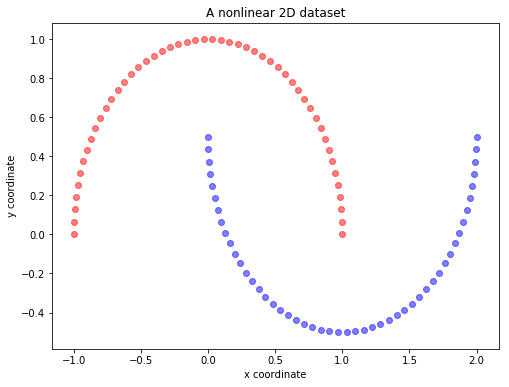

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]


In [1]:
# load data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=0)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2D dataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()
print(y)

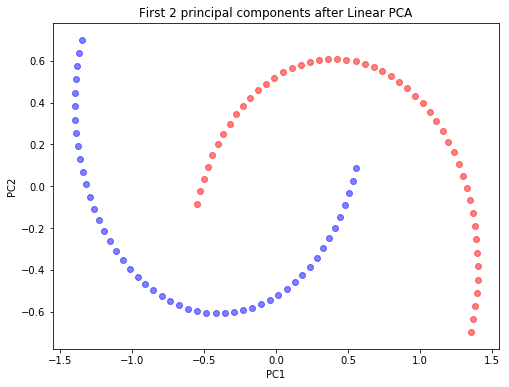

Explained Variance
[ 0.81968748  1.        ]


In [18]:
from sklearn.decomposition import PCA

def get_ml_quality(X, X_rec):
    return 1 - np.mean(np.sum((X - X_rec)**2, axis=1), axis=0) / np.mean(np.sum((X - np.mean(X, axis=0))**2, axis=1), axis=0)

scikit_pca = PCA(n_components=2)
scikit_pca.fit(X)
X_pca = scikit_pca.transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# calculate 
sample_dim = np.shape(X)[1]
explained_variance = np.zeros((sample_dim,))
for dimesion_index in range(1, sample_dim + 1):
    scikit_pca = PCA(n_components=dimesion_index)
    scikit_pca.fit(X)
    X_pca = scikit_pca.transform(X)
    X_rec = scikit_pca.inverse_transform(X_pca)
    explained_variance[dimesion_index - 1] = get_ml_quality(X, X_rec)
print('Explained Variance')
print(explained_variance)

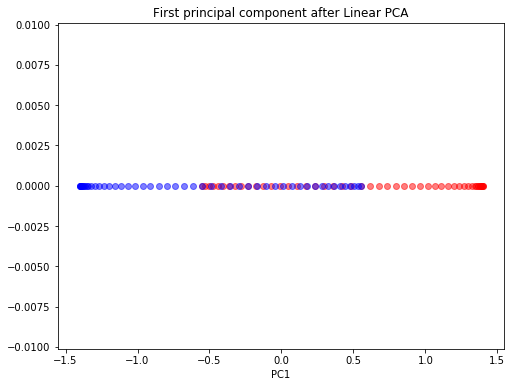

In [19]:
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_pca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

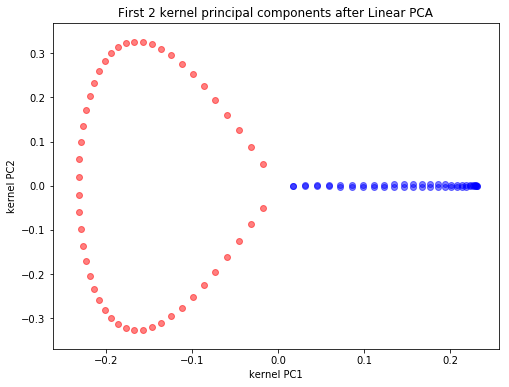

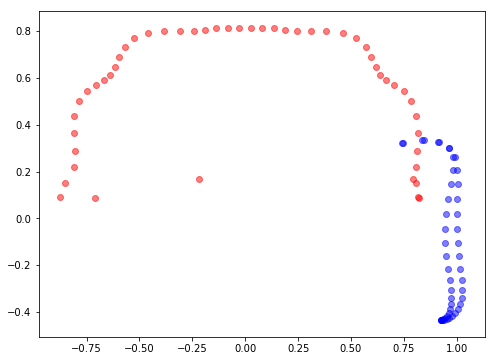

Explained Variance
[ 0.47993035  0.73447218]


In [20]:
# Exercise 1
# Repeat previous experiments for kernel PCA from sklearn and compare results with PCA
# Suggested parameters: kernel = "rbf", gamma = 15

from sklearn.decomposition import KernelPCA

gamma = 100

scikit_kpca = KernelPCA(n_components=2, kernel = "rbf", gamma = gamma, fit_inverse_transform = True)
scikit_kpca.fit(X)
X_kpca = scikit_kpca.transform(X)
X_rec = scikit_kpca.inverse_transform(X_kpca)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 kernel principal components after Linear PCA')
plt.xlabel('kernel PC1')
plt.ylabel('kernel PC2')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_rec[y==0, 0], X_rec[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_rec[y==1, 0], X_rec[y==1, 1], color='blue', alpha=0.5)
plt.show()

# calculate 
sample_dim = np.shape(X)[1]
explained_variance = np.zeros((sample_dim,))
for dimesion_index in range(1, sample_dim + 1):
    scikit_kpca = KernelPCA(n_components=dimesion_index, kernel = "rbf", gamma = gamma, fit_inverse_transform = True)
    scikit_kpca.fit(X)
    X_kpca = scikit_kpca.transform(X)
    X_rec = scikit_kpca.inverse_transform(X_kpca)
    explained_variance[dimesion_index - 1] = get_ml_quality(X, X_rec)
print('Explained Variance')
print(explained_variance)

## Circles Sample

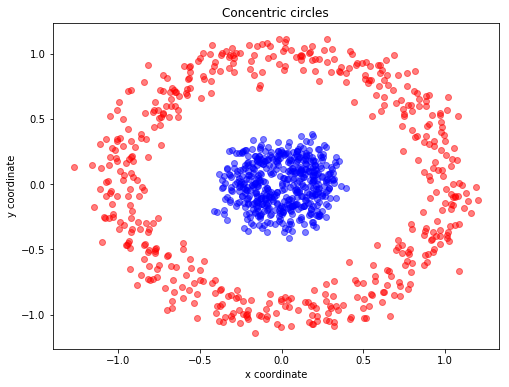

In [21]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

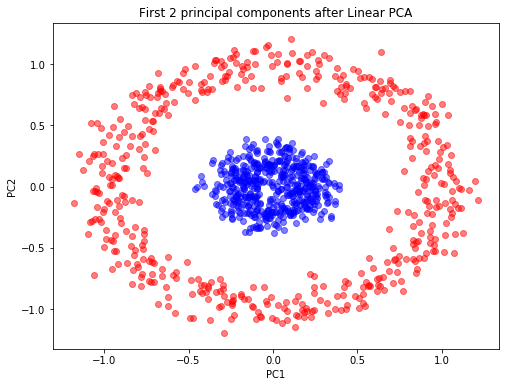

Explained Variance
[ 0.50197604  1.        ]


In [22]:
# Exercise 2
## Apply PCA to the given sample

scikit_pca = PCA(n_components=2)
scikit_pca.fit(X)
X_pca = scikit_pca.transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# calculate 
sample_dim = np.shape(X)[1]
explained_variance = np.zeros((sample_dim,))
for dimesion_index in range(1, sample_dim + 1):
    scikit_pca = PCA(n_components=dimesion_index)
    scikit_pca.fit(X)
    X_pca = scikit_pca.transform(X)
    X_rec = scikit_pca.inverse_transform(X_pca)
    explained_variance[dimesion_index - 1] = get_ml_quality(X, X_rec)
print('Explained Variance')
print(explained_variance)

# Exercise 3
## Apply kernel PCA to the given sample

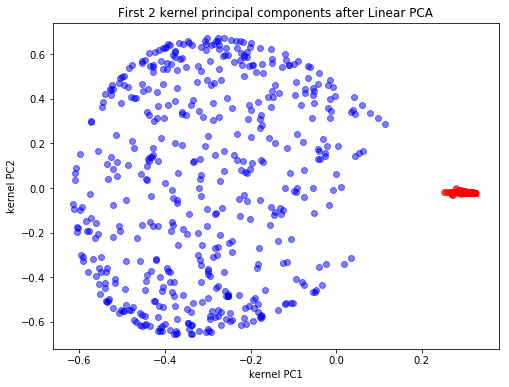

Explained Variance
[ 0.00468333  0.04379468]


In [23]:
gamma = 15

scikit_kpca = KernelPCA(n_components=2, kernel = "rbf", gamma = gamma, fit_inverse_transform = True)
scikit_kpca.fit(X)
X_kpca = scikit_kpca.transform(X)
X_rec = scikit_kpca.inverse_transform(X_kpca)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 kernel principal components after Linear PCA')
plt.xlabel('kernel PC1')
plt.ylabel('kernel PC2')
plt.show()

# calculate 
sample_dim = np.shape(X)[1]
explained_variance = np.zeros((sample_dim,))
for dimesion_index in range(1, sample_dim + 1):
    scikit_kpca = KernelPCA(n_components=dimesion_index, kernel = "rbf", gamma = gamma, fit_inverse_transform = True)
    scikit_kpca.fit(X)
    X_kpca = scikit_kpca.transform(X)
    X_rec = scikit_kpca.inverse_transform(X_kpca)
    explained_variance[dimesion_index - 1] = get_ml_quality(X, X_rec)
print('Explained Variance')
print(explained_variance)

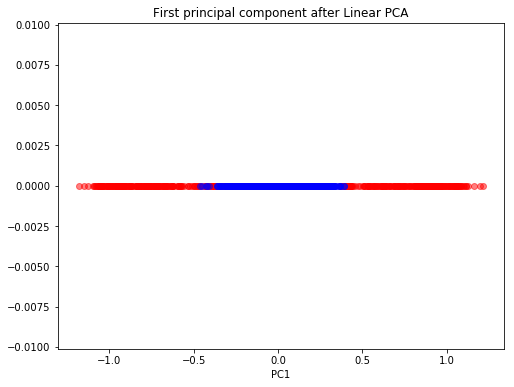

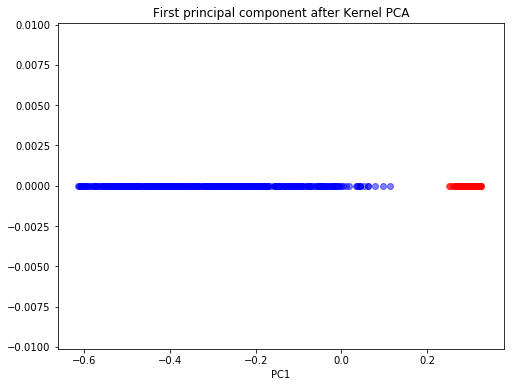

In [24]:
scikit_pca = KernelPCA(n_components=1, kernel = "rbf", gamma = gamma, fit_inverse_transform = True)
X_kpca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_pca[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)

plt.title('First principal component after Kernel PCA')
plt.xlabel('PC1')

plt.show()

## Swiss Roll Sample

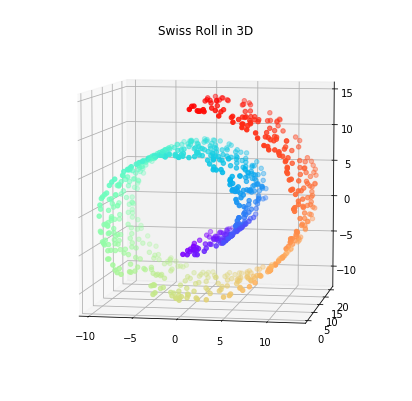

In [25]:
from sklearn.datasets.samples_generator import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

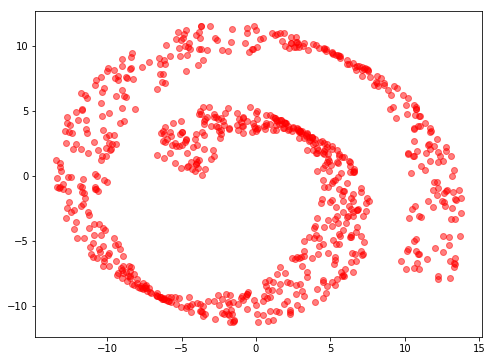

Explained Variance
[ 0.40317759  0.70939105  1.        ]


In [26]:
# Exercise 4
## Apply PCA to the given sample

scikit_pca = PCA(n_components=2)
scikit_pca.fit(X)
X_pca = scikit_pca.transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='red', alpha=0.5)

plt.show()

# calculate 
sample_dim = np.shape(X)[1]
explained_variance = np.zeros((sample_dim,))
for dimesion_index in range(1, sample_dim + 1):
    scikit_pca = PCA(n_components=dimesion_index)
    scikit_pca.fit(X)
    X_pca = scikit_pca.transform(X)
    X_rec = scikit_pca.inverse_transform(X_pca)
    explained_variance[dimesion_index - 1] = get_ml_quality(X, X_rec)
print('Explained Variance')
print(explained_variance)

# Exercise 5
## Apply kernel PCA to the given sample

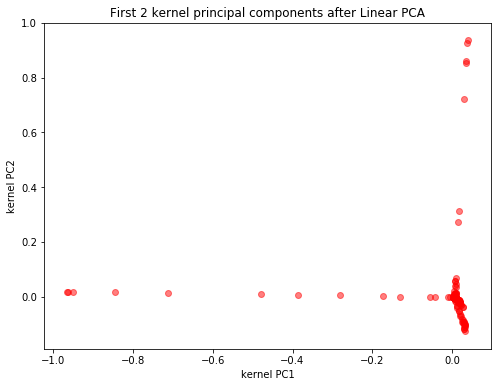

Explained Variance
[ 0.00563374  0.00963433  0.02427482]


In [27]:
gamma = 1

scikit_kpca = KernelPCA(n_components=2, kernel = "rbf", gamma = gamma, fit_inverse_transform = True)
scikit_kpca.fit(X)
X_kpca = scikit_kpca.transform(X)
X_rec = scikit_kpca.inverse_transform(X_kpca)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], color='red', alpha=0.5)

plt.title('First 2 kernel principal components after Linear PCA')
plt.xlabel('kernel PC1')
plt.ylabel('kernel PC2')
plt.show()

# calculate 
sample_dim = np.shape(X)[1]
explained_variance = np.zeros((sample_dim,))
for dimesion_index in range(1, sample_dim + 1):
    scikit_kpca = KernelPCA(n_components=dimesion_index, kernel = "rbf", gamma = gamma, fit_inverse_transform = True)
    scikit_kpca.fit(X)
    X_kpca = scikit_kpca.transform(X)
    X_rec = scikit_kpca.inverse_transform(X_kpca)
    explained_variance[dimesion_index - 1] = get_ml_quality(X, X_rec)
print('Explained Variance')
print(explained_variance)

# Part 2. Manifold Learning Methods

In [28]:
# Exercise 6
# Apply 
# 'LLE', 'LTSA', 'Hessian LLE', 'Modified LLE', "Isomap", "MDS", "Spectral Embedding", "t-SNE"
# from sklearn.manifold (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold) 
# to the Swiss Roll sample and compare results

# Exercise 7
# Which methods have OoS extensions? Which methods have reconstuction? Apply to the dat if any.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.datasets.samples_generator import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

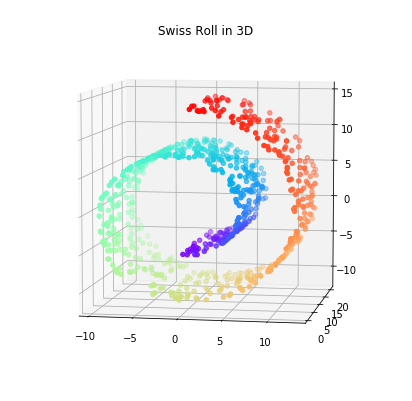

In [29]:
X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

In [24]:
print(color.shape)

(800,)


In [17]:
# try IsoMap

import sklearn.manifold

model = sklearn.manifold.Isomap(n_neighbors=10, n_components=2)
model.fit(X)
transormed_X = model.transform(X)

In [19]:
print(X.shape)

(800, 3)


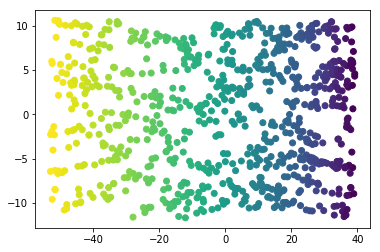

In [16]:
plt.scatter(transormed_X[:, 0], transormed_X[:, 1], c=color)

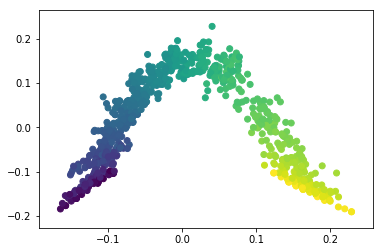

In [33]:
# try Spectral Embedding = Laplacian Eigenmaps

model = sklearn.manifold.SpectralEmbedding(n_neighbors=10)
transormed_X = model.fit_transform(X)

plt.scatter(transormed_X[:, 0], transormed_X[:, 1], c=color)

Automatically created module for IPython interactive environment
standard: 0.17 sec
ltsa: 0.45 sec
hessian: 0.51 sec
modified: 0.29 sec
Isomap: 0.45 sec
MDS: 2.9 sec
SpectralEmbedding: 0.074 sec
t-SNE: 3.8 sec


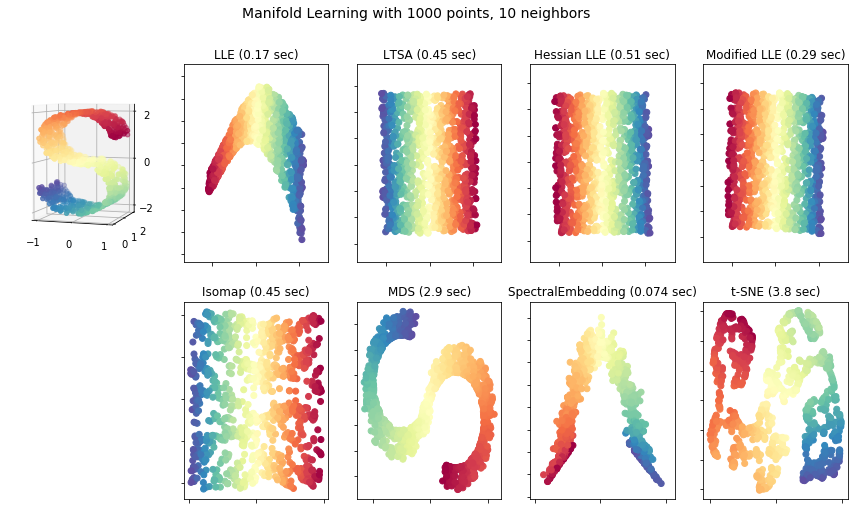

In [30]:
# try all possible methods
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(251, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
except:
    ax = fig.add_subplot(251, projection='3d')
    plt.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()